# MD_1 RMSD Plotting with mdtraj and Pandas DataFrame 

In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd

In [2]:
residue_selection = "not (resid 622 or resid 623 or resid 624 or resid 933 or resid 934 or resid 935 or resid 1244 or resid 1245 or resid 1246 or resid 0 or resid 1 or resid 2 or resid 311 or resid 312 or resid 313)"

In [3]:
location = '/media/scottzhuang/data/MD/4NPQ_PH7_md1/'

In [4]:
def rmsd_ecd_dataframe(traj_name, ref_name):
    traj_location = location + traj_name + '/4NPQ_' + traj_name + '_md.skip10.ca.xtc' 
    top_location = location + traj_name + '/4NPQ_' + traj_name + '_md.ca.gro' 
    if ref_name == 'self':
        ref_location = location + traj_name + '/4NPQ_' + traj_name + '_md.ca.gro'
    elif ref_name == '4NPQmd':
        ref_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md1/BA1/4NPQ_BA1_md.ca.gro'
    else:
        ref_location = '/media/scottzhuang/data/MD/pdb_ensemble/' + ref_name + '_1.mer.pdb'
    traj = md.load(traj_location,top=top_location)
    ref = md.load(ref_location)
    topology = traj.topology
    if traj.n_atoms != ref.n_atoms:
        traj = traj.atom_slice(topology.select(residue_selection))
    traj = traj.atom_slice(topology.select("resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441"))
    ref = ref.atom_slice(topology.select("resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441"))
    traj.superpose(ref)
    rmsd_data = pd.DataFrame({'RMSD':md.rmsd(traj, ref)*10,'time':traj.time/1000})
    return rmsd_data

In [5]:
def rmsd_tmd_dataframe(traj_name, ref_name):
    traj_location = location + traj_name + '/4NPQ_' + traj_name + '_md.skip10.ca.xtc' 
    top_location = location + traj_name + '/4NPQ_' + traj_name + '_md.ca.gro' 
    if ref_name == 'self':
        ref_location = location + traj_name + '/4NPQ_' + traj_name + '_md.ca.gro'
    elif ref_name == '4NPQmd':
        ref_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md1/BA1/4NPQ_BA1_md.ca.gro'
    else:
        ref_location = '/media/scottzhuang/data/MD/pdb_ensemble/' + ref_name + '_1.mer.pdb'
    traj = md.load(traj_location,top=top_location)
    ref = md.load(ref_location)
    topology = traj.topology
    if traj.n_atoms != ref.n_atoms:
        traj = traj.atom_slice(topology.select(residue_selection))
    traj = traj.atom_slice(topology.select("not (resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441)"))
    ref = ref.atom_slice(topology.select("not (resid 0 to 197 or resid 311 to 508 or resid 622 to 819 or resid 933 to 1130 or resid 1244 to 1441)"))
    traj.superpose(ref)
    rmsd_data = pd.DataFrame({'RMSD':md.rmsd(traj, ref)*10,'time':traj.time/1000})
    return rmsd_data

In [6]:
def rmsd_dataframe(traj_name, ref_name):
    traj_location = location + traj_name + '/4NPQ_' + traj_name + '_md.skip10.ca.xtc' 
    top_location = location + traj_name + '/4NPQ_' + traj_name + '_md.ca.gro' 
    if ref_name == 'self':
        ref_location = location + traj_name + '/4NPQ_' + traj_name + '_md.ca.gro'
    elif ref_name == '4NPQmd':
        ref_location = '/media/scottzhuang/data/MD/4NPQ_PH7_md1/BA1/4NPQ_BA1_md.ca.gro'
    else:
        ref_location = '/media/scottzhuang/data/MD/pdb_ensemble/' + ref_name + '_1.mer.pdb'
    traj = md.load(traj_location,top=top_location)
    ref = md.load(ref_location)
    topology = traj.topology
    if traj.n_atoms != ref.n_atoms:
        traj = traj.atom_slice(topology.select(residue_selection))
    traj.superpose(ref)
    rmsd_data = pd.DataFrame({'RMSD':md.rmsd(traj, ref)*10,'time':traj.time/1000})
    return rmsd_data

In [7]:
def plotrmsd(rmsd1,rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    rmsd1.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="WT")
    rmsd2.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="F238L")
    rmsd3.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="I233T")
    rmsd4.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="F238LI233T")
    fig.suptitle('MD1 ' + note)
    fig.tight_layout()

In [8]:
def plotrmsdhist(rmsd1,rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    rmsd1.plot.hist(x='time',bins=100,ax=axes[0,0],legend=False,title="WT")
    rmsd2.plot.hist(x='time',bins=100,ax=axes[0,1],legend=False,title="F238L")
    rmsd3.plot.hist(x='time',bins=100,ax=axes[1,0],legend=False,title="I233T")
    rmsd4.plot.hist(x='time',bins=100,ax=axes[1,1],legend=False,title="F238LI233T")
    fig.suptitle('MD1 ' + note)
    fig.tight_layout()

In [9]:
def plotrmsdall(rmsd1,rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    rmsd1.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    rmsd2.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    rmsd3.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    rmsd4.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
    axes.legend(['WT', 'F238L','I233T','I233TF238L'])
    fig.suptitle('MD1 ' + note)

In [10]:
def plotrmsdhistall(rmsd1,rmsd2,rmsd3,rmsd4,note):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    rmsd1.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    rmsd2.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    rmsd3.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    rmsd4.plot.hist(x='time',bins=100,ax=axes,alpha=0.7)
    axes.legend(['WT', 'F238L','I233T','I233TF238L'])
    fig.suptitle('MD1 ' + note)

## Ref: First Frame of each MD ensemble (CA, 1555 atoms)

In [11]:
rmsd_4NPQ_BA1 = rmsd_dataframe("BA1","self")
rmsd_4NPQ_BA1_F238L = rmsd_dataframe("BA1_F238L","self")
rmsd_4NPQ_BA1_I233T = rmsd_dataframe("BA1_I233T","self")
rmsd_4NPQ_BA1_F238LI233T = rmsd_dataframe("BA1_F238LI233T","self")

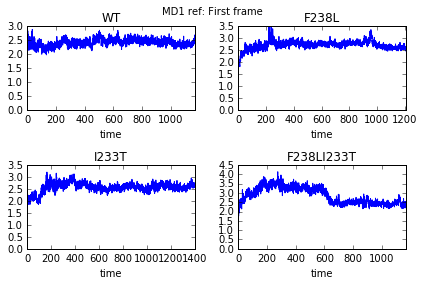

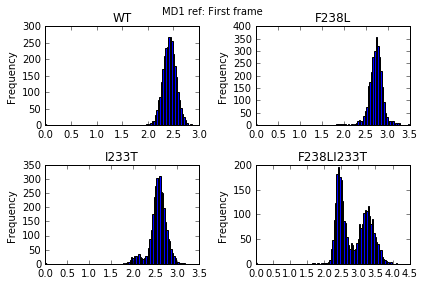

In [12]:
plotrmsd(rmsd_4NPQ_BA1,rmsd_4NPQ_BA1_F238L,rmsd_4NPQ_BA1_I233T,rmsd_4NPQ_BA1_F238LI233T,note='ref: First frame')
plotrmsdhist(rmsd_4NPQ_BA1,rmsd_4NPQ_BA1_F238L,rmsd_4NPQ_BA1_I233T,rmsd_4NPQ_BA1_F238LI233T,note='ref: First frame')

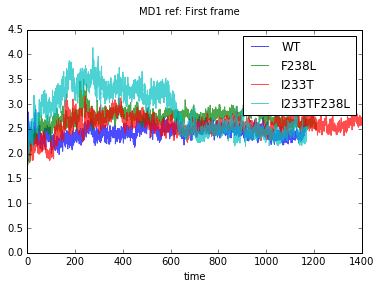

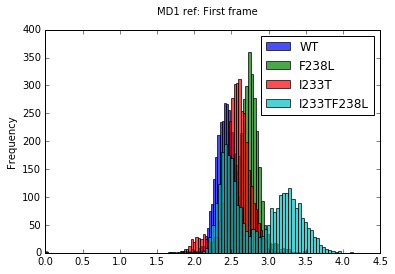

In [13]:
plotrmsdall(rmsd_4NPQ_BA1,rmsd_4NPQ_BA1_F238L,rmsd_4NPQ_BA1_I233T,rmsd_4NPQ_BA1_F238LI233T,note='ref: First frame')
plotrmsdhistall(rmsd_4NPQ_BA1,rmsd_4NPQ_BA1_F238L,rmsd_4NPQ_BA1_I233T,rmsd_4NPQ_BA1_F238LI233T,note='ref: First frame')

## Ref: First Frame of 4NPQ MD (CA, 1555 atoms)

In [14]:
rmsd_4NPQ_BA1_ref_4NPQmd = rmsd_dataframe("BA1","4NPQmd")
rmsd_4NPQ_BA1_F238L_ref_4NPQmd = rmsd_dataframe("BA1_F238L","4NPQmd")
rmsd_4NPQ_BA1_I233T_ref_4NPQmd = rmsd_dataframe("BA1_I233T","4NPQmd")
rmsd_4NPQ_BA1_F238LI233T_ref_4NPQmd = rmsd_dataframe("BA1_F238LI233T","4NPQmd")

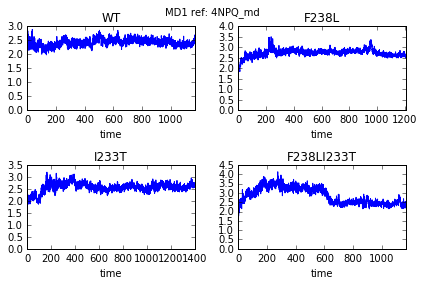

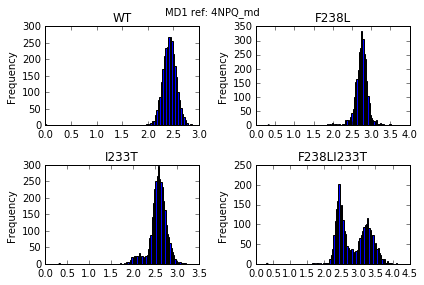

In [15]:
plotrmsd(rmsd_4NPQ_BA1_ref_4NPQmd,rmsd_4NPQ_BA1_F238L_ref_4NPQmd,rmsd_4NPQ_BA1_I233T_ref_4NPQmd,rmsd_4NPQ_BA1_F238LI233T_ref_4NPQmd,note='ref: 4NPQ_md')
plotrmsdhist(rmsd_4NPQ_BA1_ref_4NPQmd,rmsd_4NPQ_BA1_F238L_ref_4NPQmd,rmsd_4NPQ_BA1_I233T_ref_4NPQmd,rmsd_4NPQ_BA1_F238LI233T_ref_4NPQmd,note='ref: 4NPQ_md')

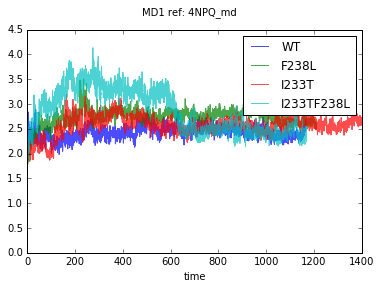

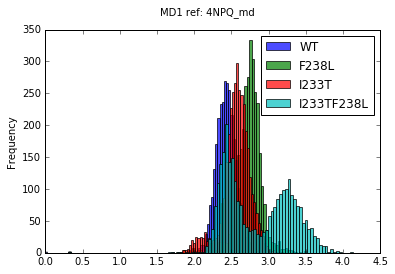

In [16]:
plotrmsdall(rmsd_4NPQ_BA1_ref_4NPQmd,rmsd_4NPQ_BA1_F238L_ref_4NPQmd,rmsd_4NPQ_BA1_I233T_ref_4NPQmd,rmsd_4NPQ_BA1_F238LI233T_ref_4NPQmd,note='ref: 4NPQ_md')
plotrmsdhistall(rmsd_4NPQ_BA1_ref_4NPQmd,rmsd_4NPQ_BA1_F238L_ref_4NPQmd,rmsd_4NPQ_BA1_I233T_ref_4NPQmd,rmsd_4NPQ_BA1_F238LI233T_ref_4NPQmd,note='ref: 4NPQ_md')

## Ref: 4NPQ_1 XRD

In [17]:
rmsd_4NPQ_BA1_ref_4NPQxrd = rmsd_dataframe("BA1","4NPQ")
rmsd_4NPQ_BA1_F238L_ref_4NPQxrd = rmsd_dataframe("BA1_F238L","4NPQ")
rmsd_4NPQ_BA1_I233T_ref_4NPQxrd = rmsd_dataframe("BA1_I233T","4NPQ")
rmsd_4NPQ_BA1_F238LI233T_ref_4NPQxrd = rmsd_dataframe("BA1_F238LI233T","4NPQ")

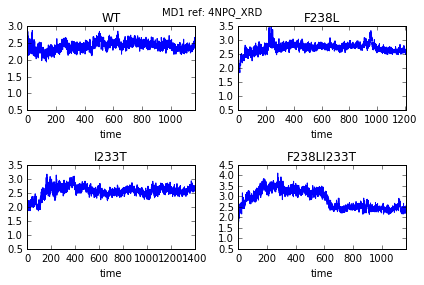

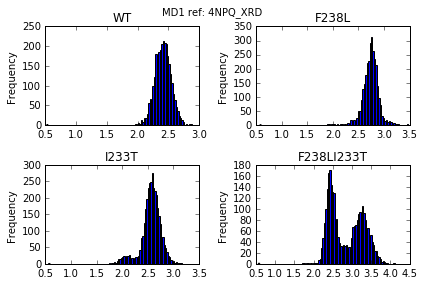

In [18]:
plotrmsd(rmsd_4NPQ_BA1_ref_4NPQxrd,rmsd_4NPQ_BA1_F238L_ref_4NPQxrd,rmsd_4NPQ_BA1_I233T_ref_4NPQxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4NPQxrd,note='ref: 4NPQ_XRD')
plotrmsdhist(rmsd_4NPQ_BA1_ref_4NPQxrd,rmsd_4NPQ_BA1_F238L_ref_4NPQxrd,rmsd_4NPQ_BA1_I233T_ref_4NPQxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4NPQxrd,note='ref: 4NPQ_XRD')

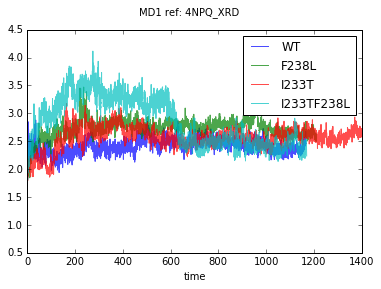

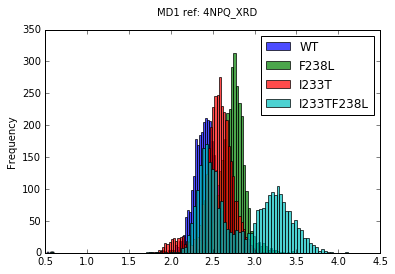

In [19]:
plotrmsdall(rmsd_4NPQ_BA1_ref_4NPQxrd,rmsd_4NPQ_BA1_F238L_ref_4NPQxrd,rmsd_4NPQ_BA1_I233T_ref_4NPQxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4NPQxrd,note='ref: 4NPQ_XRD')
plotrmsdhistall(rmsd_4NPQ_BA1_ref_4NPQxrd,rmsd_4NPQ_BA1_F238L_ref_4NPQxrd,rmsd_4NPQ_BA1_I233T_ref_4NPQxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4NPQxrd,note='ref: 4NPQ_XRD')

## Ref: 4HFI_1 XRD

In [20]:
rmsd_4NPQ_BA1_ref_4HFIxrd = rmsd_dataframe("BA1","4HFI")
rmsd_4NPQ_BA1_F238L_ref_4HFIxrd = rmsd_dataframe("BA1_F238L","4HFI")
rmsd_4NPQ_BA1_I233T_ref_4HFIxrd = rmsd_dataframe("BA1_I233T","4HFI")
rmsd_4NPQ_BA1_F238LI233T_ref_4HFIxrd = rmsd_dataframe("BA1_F238LI233T","4HFI")

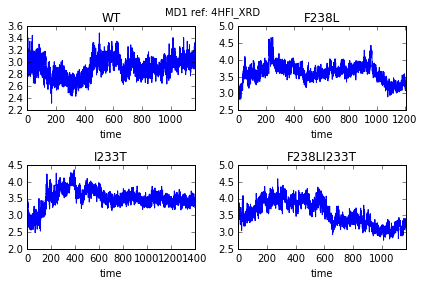

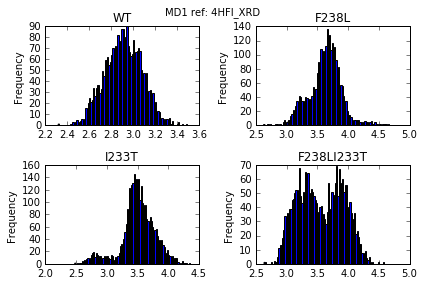

In [21]:
plotrmsd(rmsd_4NPQ_BA1_ref_4HFIxrd,rmsd_4NPQ_BA1_F238L_ref_4HFIxrd,rmsd_4NPQ_BA1_I233T_ref_4HFIxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4HFIxrd,note='ref: 4HFI_XRD')
plotrmsdhist(rmsd_4NPQ_BA1_ref_4HFIxrd,rmsd_4NPQ_BA1_F238L_ref_4HFIxrd,rmsd_4NPQ_BA1_I233T_ref_4HFIxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4HFIxrd,note='ref: 4HFI_XRD')

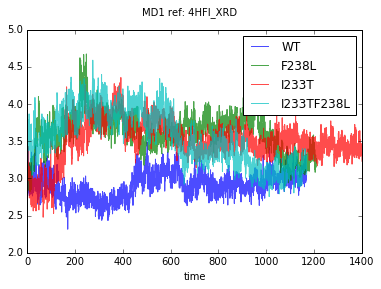

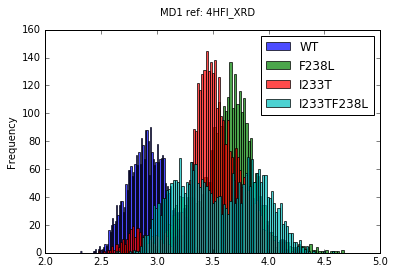

In [22]:
plotrmsdall(rmsd_4NPQ_BA1_ref_4HFIxrd,rmsd_4NPQ_BA1_F238L_ref_4HFIxrd,rmsd_4NPQ_BA1_I233T_ref_4HFIxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4HFIxrd,note='ref: 4HFI_XRD')
plotrmsdhistall(rmsd_4NPQ_BA1_ref_4HFIxrd,rmsd_4NPQ_BA1_F238L_ref_4HFIxrd,rmsd_4NPQ_BA1_I233T_ref_4HFIxrd,rmsd_4NPQ_BA1_F238LI233T_ref_4HFIxrd,note='ref: 4HFI_XRD')

## Some Comparisons

### Ref as First frame vs MD of 4NPQ vs XRD of 4NPQ

(1, 6)

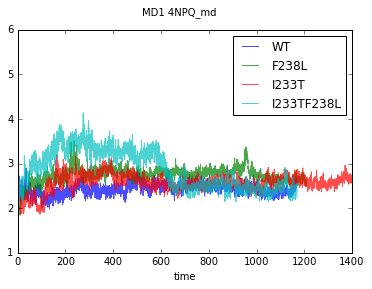

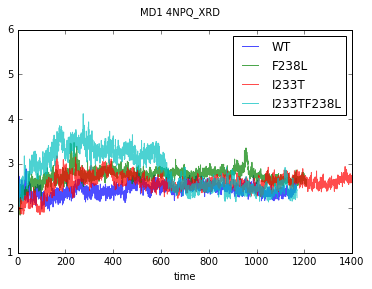

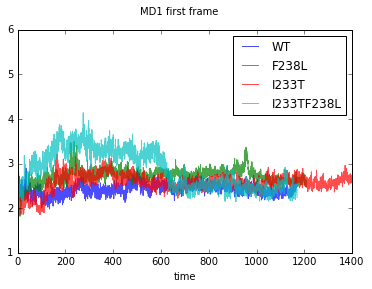

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1)
rmsd_4NPQ_BA1_ref_4NPQmd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238L_ref_4NPQmd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_I233T_ref_4NPQmd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238LI233T_ref_4NPQmd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
axes.legend(['WT', 'F238L','I233T','I233TF238L'])
fig.suptitle('MD1 ' + "4NPQ_md")
axes.set_ylim(1,6)
fig, axes = plt.subplots(nrows=1, ncols=1)
rmsd_4NPQ_BA1_ref_4NPQxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238L_ref_4NPQxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_I233T_ref_4NPQxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238LI233T_ref_4NPQxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
axes.legend(['WT', 'F238L','I233T','I233TF238L'])
fig.suptitle('MD1 ' + "4NPQ_XRD")
axes.set_ylim(1,6)
fig, axes = plt.subplots(nrows=1, ncols=1)
rmsd_4NPQ_BA1.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238L.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_I233T.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238LI233T.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
axes.legend(['WT', 'F238L','I233T','I233TF238L'])
fig.suptitle('MD1 ' + "first frame")
axes.set_ylim(1,6)

### 4NPQ_BA with different ref plot

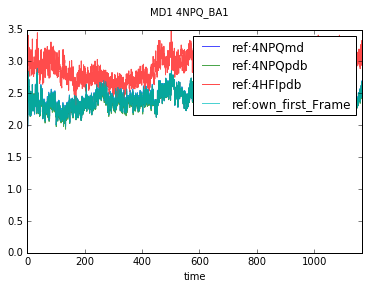

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=1)
rmsd_4NPQ_BA1_ref_4NPQmd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_ref_4NPQxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_ref_4HFIxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
axes.legend(['ref:4NPQmd','ref:4NPQpdb','ref:4HFIpdb','ref:own_first_Frame'])
fig.suptitle('MD1 ' + "4NPQ_BA1")

### 4NPQ_BA_F238L with different ref plot

(1, 6)

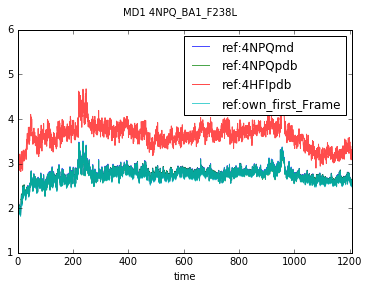

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1)
rmsd_4NPQ_BA1_F238L_ref_4NPQmd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238L_ref_4NPQxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238L_ref_4HFIxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238L.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
axes.legend(['ref:4NPQmd','ref:4NPQpdb','ref:4HFIpdb','ref:own_first_Frame'])
fig.suptitle('MD1 ' + "4NPQ_BA1_F238L")
axes.set_ylim(1,6)

### 4NPQ_BA_I233T with different ref plot

(1, 6)

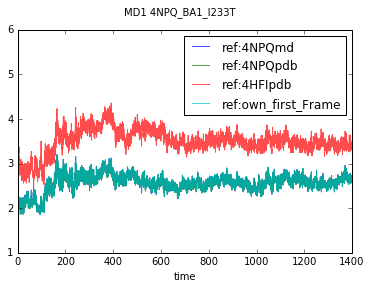

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=1)
rmsd_4NPQ_BA1_I233T_ref_4NPQmd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_I233T_ref_4NPQxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_I233T_ref_4HFIxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_I233T.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
axes.legend(['ref:4NPQmd','ref:4NPQpdb','ref:4HFIpdb','ref:own_first_Frame'])
fig.suptitle('MD1 ' + "4NPQ_BA1_I233T")
axes.set_ylim(1,6)

### 4NPQ_BA_F238LI233T with different ref plot

(1, 6)

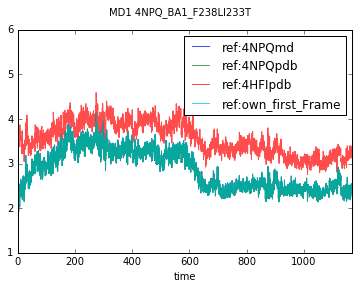

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1)
rmsd_4NPQ_BA1_F238LI233T_ref_4NPQmd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238LI233T_ref_4NPQxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238LI233T_ref_4HFIxrd.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
rmsd_4NPQ_BA1_F238LI233T.plot(x='time', y='RMSD', ax=axes,alpha=0.7)
axes.legend(['ref:4NPQmd','ref:4NPQpdb','ref:4HFIpdb','ref:own_first_Frame'])
fig.suptitle('MD1 ' + "4NPQ_BA1_F238LI233T")
axes.set_ylim(1,6)

## Partical RMSD

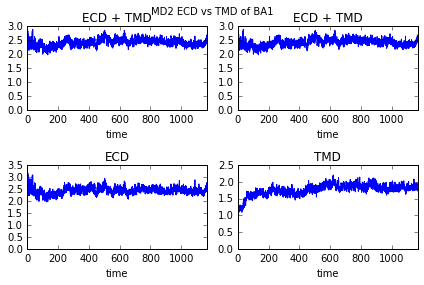

In [28]:
rmsd_ecd_4NPQ_BA1 = rmsd_ecd_dataframe("BA1","self")
rmsd_tmd_4NPQ_BA1 = rmsd_tmd_dataframe("BA1","self")
fig, axes = plt.subplots(nrows=2, ncols=2)
rmsd_4NPQ_BA1.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="ECD + TMD")
rmsd_4NPQ_BA1.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="ECD + TMD")
rmsd_ecd_4NPQ_BA1.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="ECD")
rmsd_tmd_4NPQ_BA1.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="TMD")
fig.suptitle('MD2 ' + 'ECD vs TMD of BA1')
fig.tight_layout()

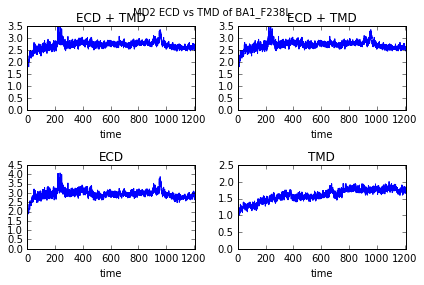

In [29]:
rmsd_ecd_4NPQ_BA1_F238L = rmsd_ecd_dataframe("BA1_F238L","self")
rmsd_tmd_4NPQ_BA1_F238L = rmsd_tmd_dataframe("BA1_F238L","self")
fig, axes = plt.subplots(nrows=2, ncols=2)
rmsd_4NPQ_BA1_F238L.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="ECD + TMD")
rmsd_4NPQ_BA1_F238L.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="ECD + TMD")
rmsd_ecd_4NPQ_BA1_F238L.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="ECD")
rmsd_tmd_4NPQ_BA1_F238L.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="TMD")
fig.suptitle('MD2 ' + 'ECD vs TMD of BA1_F238L')
fig.tight_layout()

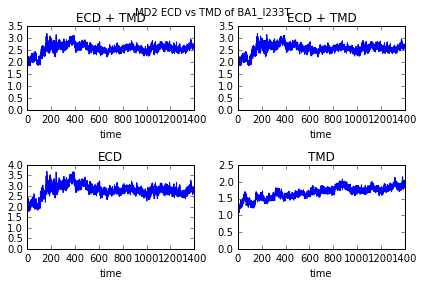

In [30]:
rmsd_ecd_4NPQ_BA1_I233T = rmsd_ecd_dataframe("BA1_I233T","self")
rmsd_tmd_4NPQ_BA1_I233T = rmsd_tmd_dataframe("BA1_I233T","self")
fig, axes = plt.subplots(nrows=2, ncols=2)
rmsd_4NPQ_BA1_I233T.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="ECD + TMD")
rmsd_4NPQ_BA1_I233T.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="ECD + TMD")
rmsd_ecd_4NPQ_BA1_I233T.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="ECD")
rmsd_tmd_4NPQ_BA1_I233T.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="TMD")
fig.suptitle('MD2 ' + 'ECD vs TMD of BA1_I233T')
fig.tight_layout()

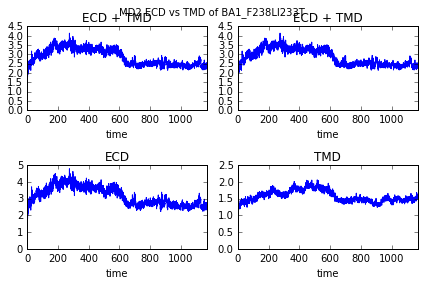

In [31]:
rmsd_ecd_4NPQ_BA1_F238LI233T = rmsd_ecd_dataframe("BA1_F238LI233T","self")
rmsd_tmd_4NPQ_BA1_F238LI233T = rmsd_tmd_dataframe("BA1_F238LI233T","self")
fig, axes = plt.subplots(nrows=2, ncols=2)
rmsd_4NPQ_BA1_F238LI233T.plot(x='time', y='RMSD', ax=axes[0,0],legend=False,title="ECD + TMD")
rmsd_4NPQ_BA1_F238LI233T.plot(x='time', y='RMSD', ax=axes[0,1],legend=False,title="ECD + TMD")
rmsd_ecd_4NPQ_BA1_F238LI233T.plot(x='time', y='RMSD', ax=axes[1,0],legend=False,title="ECD")
rmsd_tmd_4NPQ_BA1_F238LI233T.plot(x='time', y='RMSD', ax=axes[1,1],legend=False,title="TMD")
fig.suptitle('MD2 ' + 'ECD vs TMD of BA1_F238LI233T')
fig.tight_layout()